<h3>About this Notebook</h3>

This is a notebook where I want to try out k-means clustering on the iris dataset that is included in *sklearn.datasets* and apply some things that I learned in writing my own code.

<h3>Getting the data</h3>


In [1]:
import pandas as pd
from sklearn.datasets import load_iris

raw_data = load_iris()

iris_data = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)


<h3>Taking a first Look at the Data</h3>

In [7]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

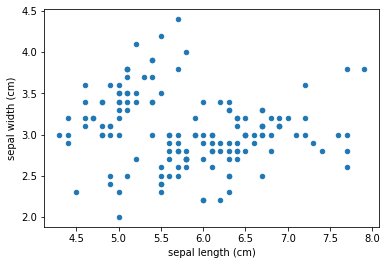

In [4]:
#looking at data in scatterplot
iris_data.plot(kind = "scatter", x = "sepal length (cm)", y = "sepal width (cm)")

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

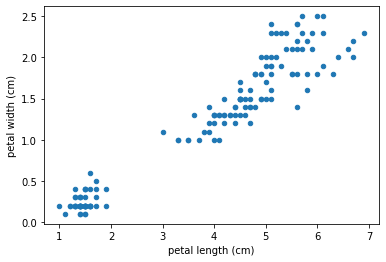

In [5]:
iris_data.plot(kind = "scatter", x = "petal length (cm)", y = "petal width (cm)")

In k-means clustering we want to find the best number of clusters. As the iris dataset is often used as an example for k-means clustering, we already know that the number of clusters is 3, but for the sake of doing it myself and practice for similar problems in the future, I want to use the so-called "Elbow Method" for determining the best pick for k.

The source I used for the process is here: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

The elbow method is useful when the number of clusters (k) is not known or cannot be simply inferred from visualizing the data. 

We start by defining two things:
* **Distortion** is the average of the squared distances from the cluster centers of the respective clusters, usually euclidean distance is used. 
* **Inertia** is the sum of squared distances of samples to their closest cluster center.




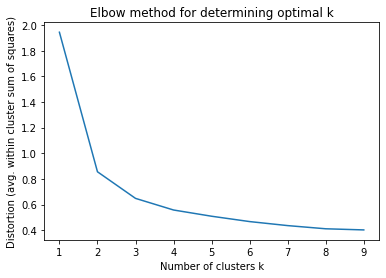

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np

#We iterate the values of k from 1 to 9 and calculate the values of distortions for each value of k...
#...and calculate the distortion and inertia for each value of k in the given range.

distortions = []
inertias = []

for k in range(1,10):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris_data)
    #inertia is attribute of our kmeans instance
    inertias.append(kmeans.inertia_)
    
    #disortion = average of squared distances from cluster centers of resp. clusters, usually euclidean 
    #...distance is used
    #cdist computes distance between each pair of the two collections of inputs
    dist_data_ccenters = cdist(iris_data, kmeans.cluster_centers_, 'euclidean')
    distortions.append(sum(np.min(dist_data_ccenters, axis=1)) / iris_data.shape[0])
    
#Plotting results 
plt.plot(range(1, 10), distortions)
plt.title('Elbow method for determining optimal k')
plt.xlabel('Number of clusters k')
plt.ylabel('Distortion (avg. within cluster sum of squares)')

plt.show()
    
    

In [8]:
#plot shows how 3 is the optimal number of clusters

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(iris_data)

KMeans(n_clusters=3, random_state=0)